#**Visualization of P300 and no-P300 epochs - BCI Competition III**

## Import required modules 
We need to import in our Python script some modules that provide us some useful functions for the analysis of the dataset.

#Access GoogleDrive

In [3]:
from google.colab import drive

In [4]:

import matplotlib.pyplot as plt   # Required to plot data
import numpy as np                # Management of arrays
import os                         # System utils
import pandas as pd
from pathlib import Path          # path and file utils
from scipy.io import loadmat      # Required to load .mat files
from scipy import signal          # Required for signal processing
from tqdm.auto import tqdm        # For progress bars

In [5]:
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
CHANNEL_LOCATIONS_FILE_PATH = Path('drive') / 'MyDrive' / 'workshop_neuro' / 'material' / 'channels.csv'
SUBJECT_A_TRAIN_FILE_PATH = Path('drive') / 'MyDrive' / 'workshop_neuro'  / 'material'/ 'Subject_A_Train.mat'
SUBJECT_A_TEST_FILE_PATH = Path('drive') / 'MyDrive' / 'workshop_neuro' / 'material' / 'Subject_A_Test.mat'
SUBJECT_A_TEST_CHARS_FILE_PATH = Path('drive') / 'MyDrive' / 'workshop_neuro' / 'material' / 'TestTargetChars.mat'
CHANNEL_LOCATIONS_FILE_PATH.exists()
#/content/drive/MyDrive/workshop_neuro /channels.csv

True

#Channels extraction

In [ ]:
if not CHANNEL_LOCATIONS_FILE_PATH.exists():
    print(f"Missing file: {CHANNEL_LOCATIONS_FILE_PATH}")
else:
  CHANNELS = []
  # Read file content
  with open(CHANNEL_LOCATIONS_FILE_PATH, "r") as f:
    file_content = f.read()
    # Loop over all rows (except first one)
    for row in file_content.split("\n")[1:]: 
      # Skip missing rows
      if row == '':
        continue
      CHANNELS.append(row)

#Subject A extraction

## Subject A train 

In [ ]:
if not SUBJECT_A_TRAIN_FILE_PATH.exists():
    print(f"Missing file: {SUBJECT_A_TRAIN_FILE_PATH}")
else:
  # Load the required data
  data_train = loadmat(SUBJECT_A_TRAIN_FILE_PATH)
  # Get the variables of interest from the loaded dictionary
  signals_train = data_train['Signal']
  flashing_train= data_train['Flashing']
  chars_train = data_train['TargetChar']
  chars_train = list(chars_train[0])
  chars_train = np.array(chars_train)
  print(chars_train)
  
  # From the dataset description we know that there are 15 repetitions
  REPETITIONS = 15
  # Compute the recording duration
  SAMPLING_FREQUENCY = 240 # -> Data are sampled at 240 Hz
  # Compute the duration of the recording in minutes
  RECORDING_DURATION_TRAIN = (len(signals_train))*(len(signals_train[0]))/(SAMPLING_FREQUENCY*60)
  # Compute number of trials
  TRIALS_TRAIN = len(chars_train)
  # Compute number of samples per trial
  SAMPLES_PER_TRIAL_TRAIN = len(signals_train[0])

  

['E' 'A' 'E' 'V' 'Q' 'T' 'D' 'O' 'J' 'G' '8' 'R' 'B' 'R' 'G' 'O' 'N' 'C'
 'E' 'D' 'H' 'C' 'T' 'U' 'I' 'D' 'B' 'P' 'U' 'H' 'M' 'E' 'M' '6' 'O' 'U'
 'X' 'O' 'C' 'F' 'O' 'U' 'K' 'W' 'A' '4' 'V' 'J' 'E' 'F' 'R' 'Z' 'R' 'O'
 'L' 'H' 'Y' 'N' 'Q' 'D' 'W' '_' 'E' 'K' 'T' 'L' 'B' 'W' 'X' 'E' 'P' 'O'
 'U' 'I' 'K' 'Z' 'E' 'R' 'Y' 'O' 'O' 'T' 'H' 'Q' 'I']


## Subject A test 

In [ ]:

if not SUBJECT_A_TEST_FILE_PATH.exists():
    print(f"Missing file: {SUBJECT_A_TEST_FILE_PATH}")
else:
  # Load the required data
  data_test = loadmat(SUBJECT_A_TEST_FILE_PATH)
  # Get the variables of interest from the loaded dictionary
  signals_test = data_test['Signal']
  flashing_test = data_test['Flashing']
  #word = data['TargetChar']

if not SUBJECT_A_TEST_CHARS_FILE_PATH.exists():
    print(f"Missing file: {SUBJECT_A_TEST_CHARS_FILE_PATH}")
else:
  # Load the required data
  data_test_char = loadmat(SUBJECT_A_TEST_CHARS_FILE_PATH)
  # Get the variables of interest from the loaded dictionary
  
  chars_test = data_test_char['A_TargetChar'] #chars_test lettere attaccate
  chars_test =  list(chars_test[0])  
  chars_test =  np.array(chars_test)
  # From the dataset description we know that there are 15 repetitions
  RECORDING_DURATION_TEST = (len(signals_test))*(len(signals_test[0]))/(SAMPLING_FREQUENCY*60)
  #
  # Compute number of samples per trial
  TRIALS_TEST = len(chars_test)
  SAMPLES_PER_TRIAL_TEST = len(signals_test[0])

  print("**********************************")
  print("        DATASET INFORMATION       ")
  print("**********************************")
  print("Sampling Frequency: %d Hz [%.2f ms]" % (SAMPLING_FREQUENCY, 
        (1000/SAMPLING_FREQUENCY)))
  print("Session duration train:   %.2f" % RECORDING_DURATION_TRAIN)
  print("Session duration test:   %.2f" % RECORDING_DURATION_TEST)
  print("Number of letters train:  %d" % TRIALS_TRAIN)
  print("Number of letters test:  %d" % TRIALS_TEST)
  print("Spelled word train:       %s" % chars_train)
  print("Spelled word test:       %s" % chars_test)
  print("signals shape train:", signals_train.shape)
  print("signals shape test:", signals_test.shape)
  print("signals size train:", signals_train.size) # multiplication of T*N*C Trials 5 Samples 7794 Channels of eeg 64
  print("signals size test:", signals_test.size) # multiplication of T*N*C Trials 5 Samples 7794 Channels of eeg 64
  print("sample per trial train:", SAMPLES_PER_TRIAL_TRAIN)
  print("sample per trial test:", SAMPLES_PER_TRIAL_TEST)


  

**********************************
        DATASET INFORMATION       
**********************************
Sampling Frequency: 240 Hz [4.17 ms]
Session duration train:   46.01
Session duration test:   54.12
Number of letters train:  85
Number of letters test:  100
Spelled word train:       ['E' 'A' 'E' 'V' 'Q' 'T' 'D' 'O' 'J' 'G' '8' 'R' 'B' 'R' 'G' 'O' 'N' 'C'
 'E' 'D' 'H' 'C' 'T' 'U' 'I' 'D' 'B' 'P' 'U' 'H' 'M' 'E' 'M' '6' 'O' 'U'
 'X' 'O' 'C' 'F' 'O' 'U' 'K' 'W' 'A' '4' 'V' 'J' 'E' 'F' 'R' 'Z' 'R' 'O'
 'L' 'H' 'Y' 'N' 'Q' 'D' 'W' '_' 'E' 'K' 'T' 'L' 'B' 'W' 'X' 'E' 'P' 'O'
 'U' 'I' 'K' 'Z' 'E' 'R' 'Y' 'O' 'O' 'T' 'H' 'Q' 'I']
Spelled word test:       ['W' 'Q' 'X' 'P' 'L' 'Z' 'C' 'O' 'M' 'R' 'K' 'O' '9' '7' 'Y' 'F' 'Z' 'D'
 'E' 'Z' '1' 'D' 'P' 'I' '9' 'N' 'N' 'V' 'G' 'R' 'Q' 'D' 'J' 'C' 'U' 'V'
 'R' 'M' 'E' 'U' 'O' 'O' 'O' 'J' 'D' '2' 'U' 'F' 'Y' 'P' 'O' 'O' '6' 'J'
 '7' 'L' 'D' 'G' 'Y' 'E' 'G' 'O' 'A' '5' 'V' 'H' 'N' 'E' 'H' 'B' 'T' 'X'
 'O' 'O' '1' 'T' 'D' 'O' 'I' 'L' 'U' 'E' 'E' '5'

#Epochs subject A extraction

## Epochs train subject A 

In [ ]:
epochs_train = []           # Init 3D array to store EEG epochs
epochDuration = int(SAMPLING_FREQUENCY/1000*1000)  # Duration of th epoch is 1000 ms
epoch_labels_binary_train = [] # Init array to store epoch labels
stimulus_code_train=[]
averagePositiveEpoch = [[0 for i in range(len(CHANNELS))] for i in range(epochDuration)] # Init average array to 0
averageNegativeEpoch = [[0 for i in range(len(CHANNELS))] for i in range(epochDuration)] # Init average array to 0 

positiveEpochs = 0 # Counter for positive epochs (P300)
negativeEpochs = 0 # Counter for negative epochs (no-P300)

# Let's prepare our butterworth filter
b,a = signal.butter(4, [0.1/SAMPLING_FREQUENCY/2, 20/SAMPLING_FREQUENCY/2], 'bandpass')
P300=1
NP300=0

# For loop over all the trials
for trial in tqdm(range(TRIALS_TRAIN),desc='Trials'):
  for sample in range(SAMPLES_PER_TRIAL_TRAIN):
    # Check if flashing changed from 0 or 1 or if it's the first sample (always 1)
    if ( sample == 0 or (flashing_train[trial, sample-1] == 0 and flashing_train[trial, sample] == 1)):
      # We have an epoch to extract
      lower_sample = sample
      upper_sample = sample + epochDuration
      epoch = signals_train[trial, int(lower_sample):int(upper_sample), :]
      epoch = signal.filtfilt(b, a, epoch, axis = 0)
      epochs_train.append(epoch)
      stimulus_code_train.append(data_train['StimulusCode'][trial][sample])
      #epoch_labels_binary.append(data['StimulusType'][trial,sample])
      # Check if P300 or no P300
      if (data_train['StimulusType'][trial, sample] == 1):
        averagePositiveEpoch = averagePositiveEpoch + epoch
        positiveEpochs = positiveEpochs + 1
        epoch_labels_binary_train.append(P300)
       
      else:
        averageNegativeEpoch = averageNegativeEpoch + epoch
        negativeEpochs = negativeEpochs + 1
        epoch_labels_binary_train.append(NP300)             

# Compute average
averagePositiveEpoch = averagePositiveEpoch/positiveEpochs
averageNegativeEpoch = averageNegativeEpoch/negativeEpochs 
epochs_train = np.array(epochs_train)
epoch_labels_binary_train = np.array(epoch_labels_binary_train)
stimulus_code_train = np.array(stimulus_code_train)


## Epochs test subject A 

In [ ]:
epochs_test = []              # Init 3D array to store EEG epochs
epochDuration = int(SAMPLING_FREQUENCY/1000*1000)  # Duration of th epoch is 1000 ms
epoch_labels_binary_test = [] # Init array to store epoch labels
stimulus_code_test=[]
averagePositiveEpoch = [[0 for i in range(len(CHANNELS))] for i in range(epochDuration)] # Init average array to 0
averageNegativeEpoch = [[0 for i in range(len(CHANNELS))] for i in range(epochDuration)] # Init average array to 0 

positiveEpochs = 0 # Counter for positive epochs (P300)
negativeEpochs = 0 # Counter for negative epochs (no-P300)

# Let's prepare our butterworth filter
b,a = signal.butter(4, [0.1/SAMPLING_FREQUENCY/2, 20/SAMPLING_FREQUENCY/2], 'bandpass')
P300=1
NP300=0

# For loop over all the trials
for trial in tqdm(range(TRIALS_TEST),desc='Trials'):
  for sample in range(SAMPLES_PER_TRIAL_TEST):
    # Check if flashing changed from 0 or 1 or if it's the first sample (always 1)
    if ( sample == 0 or (flashing_test[trial, sample-1] == 0 and flashing_test[trial, sample] == 1)):
      # We have an epoch to extract
      lower_sample = sample
      upper_sample = sample + epochDuration
      epoch = signals_test[trial, int(lower_sample):int(upper_sample), :]
      epoch = signal.filtfilt(b, a, epoch, axis = 0)
      epochs_test.append(epoch)
      stimulus_code_test.append(data_test['StimulusCode'][trial][sample])
      #epoch_labels_binary.append(data['StimulusType'][trial,sample])
      # Check if P300 or no P300

      #if (data_train['StimulusType'][trial, sample] == 1):
      #  averagePositiveEpoch = averagePositiveEpoch + epoch
      #  positiveEpochs = positiveEpochs + 1
      #  epoch_labels_binary.append(P300)
       
      #else:
      #  averageNegativeEpoch = averageNegativeEpoch + epoch
      #  negativeEpochs = negativeEpochs + 1
      #  epoch_labels_binary.append(NP300)

epochs_test = np.array(epochs_test)
stimulus_code_test = np.array(stimulus_code_test)
 
for trial in range(TRIALS_TEST):
  if chars_test[trial] == 'A'or chars_test[trial] =='B' or chars_test[trial] =='C' or chars_test[trial] =='D' or chars_test[trial] =='E' or chars_test[trial] =='F':
    row_code = 7
  elif chars_test[trial]=='G' or chars_test[trial] =='H' or chars_test[trial] =='I' or chars_test[trial] == 'J'or chars_test[trial] =='K' or chars_test[trial] == 'L':
    row_code = 8
  elif chars_test[trial]=='M' or chars_test[trial] =='N' or chars_test[trial] =='O' or chars_test[trial] =='P' or chars_test[trial] =='Q' or chars_test[trial] =='R':
    row_code = 9
  elif chars_test[trial]==  'S' or chars_test[trial] =='T' or chars_test[trial] == 'U' or chars_test[trial] =='V' or chars_test[trial] =='W' or chars_test[trial] =='X':
    row_code = 10
  elif chars_test[trial]== 'Y' or chars_test[trial] == 'Z' or chars_test[trial] == '1' or chars_test[trial] =='2' or chars_test[trial] =='3' or chars_test[trial] =='4':
    row_code = 11
  else:
    row_code = 12
  if chars_test[trial] == 'A'or chars_test[trial] ==  'G' or chars_test[trial] ==  'M'  or chars_test[trial]=='S' or chars_test[trial] == 'Y' or chars_test[trial]=='5':
    column_code = 1
  elif chars_test[trial]=='B' or  chars_test[trial] == 'H' or chars_test[trial] == 'N' or chars_test[trial] == 'T'or chars_test[trial] == 'Z' or  chars_test[trial] == '6':
    column_code = 2
  elif chars_test[trial]=='C' or chars_test[trial] =='I' or chars_test[trial] == 'O' or chars_test[trial] == 'U' or chars_test[trial] == '1' or chars_test[trial] == '7':
    column_code = 3
  elif chars_test[trial]==  'D' or chars_test[trial] == 'J' or chars_test[trial] =='P' or chars_test[trial] =='V' or chars_test[trial] =='2' or chars_test[trial] == '8':
    column_code = 4
  elif chars_test[trial]== 'E' or chars_test[trial] =='K' or chars_test[trial] =='Q' or chars_test[trial] =='W' or chars_test[trial] == '3' or chars_test[trial] =='9':
    column_code = 5
  else: 
    column_code = 6
    
  for i in range(180*trial,180*(trial+1)):
    if stimulus_code_test[i]== row_code or stimulus_code_test[i]== column_code:
      epoch_labels_binary_test.append(1)
    else:
      epoch_labels_binary_test.append(0)

epoch_labels_binary_test = np.array(epoch_labels_binary_test)     

# Compute average
#averagePositiveEpoch = averagePositiveEpoch/positiveEpochs
#averageNegativeEpoch = averageNegativeEpoch/negativeEpochs 

#print('shape epochs train:',epochs_train.shape)
print('shape epochs test:',epochs_test.shape)
#print('shape epochs labels train',epoch_labels_binary_train.shape)
print('shape epochs labels test',epoch_labels_binary_test.shape)




shape epochs test: (18000, 240, 64)
shape epochs labels test (18000,)


#Downsampling

In [ ]:
epochs_train_downsampling = signal.decimate(epochs_train,2,axis=1,ftype='iir')

In [ ]:
epochs_train_downsampling.shape

(15300, 120, 64)

In [ ]:
import h5py

hf = h5py.File('/content/drive/MyDrive/workshop_neuro/dataset/A/train_A_DOWNSAMPLING_IIR_120.h5', 'w')
hf.create_dataset('dataset_epoch_train', data=epochs_train_downsampling) 
hf.create_dataset('dataset_epoch_labels_train', data=epoch_labels_binary_train)
hf.close()

In [ ]:
epochs_test_downsampling = signal.decimate(epochs_test,2,axis=1,ftype='iir')

In [ ]:
import h5py

hf1 = h5py.File('/content/drive/MyDrive/workshop_neuro/dataset/A/test_A_DOWNSAMPLING_IIR_120.h5', 'w')
hf1.create_dataset('dataset_epoch_test', data=epochs_test_downsampling) 
hf1.create_dataset('dataset_epoch_labels_test', data=epoch_labels_binary_test)
hf1.close()

In [ ]:
#Make Graph for normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler   # use the min max scaler between [-1,1] for PCA
from sklearn.decomposition import PCA
#dataset = []
epoch_pca_train = []
epoch_pca_test = []
dataset_t=[]
for i in range(64) :
  dataset = epochs_train[:,:,i] 
  dataset_test = epochs_test[:,:,i]  
  # Apply min max scaler
  mm_scaler =  MinMaxScaler(copy=False,feature_range=(-1, 1))   
  mm_scaler.fit_transform(dataset) 
  mm_scaler.transform(dataset_test)
  dataset_t.append(dataset_test)
  #df = pd.DataFrame(dataset_t)

In [ ]:
dataset_t=np.array(dataset_t)
dataset_t.shape

In [ ]:
epoch_test_mm=[]
for i in range(64):
  a = dataset_t[i,:,:].transpose()
  epoch_test_mm.append(a)
epoch_test_mm = np.array(epoch_test_mm)
epoch_test_mm = epoch_test_mm.transpose()
epoch_test_mm.shape

In [ ]:
plt.plot(epoch_test_mm[0,:,0:12])
# Set up labels and titles
plt.title('Subject A: EEG signals for 1st Epoch and 12 Channels')
plt.xticks([0, 72, 140, 216], ['0', '300', '600', '900'], rotation = 0)
plt.xlabel('Time (ms)')
plt.ylabel('EEG Signal')

#Normalization and PCA 

In [ ]:
#Standardization for each epoch on channels and PCA on time
from sklearn.preprocessing import MinMaxScaler   # use the min max scaler between [-1,1] for PCA
from sklearn.decomposition import PCA
#dataset = []
epoch_pca_train = []
epoch_pca_test = []
for i in range(64) :
  dataset = epochs_train[:,:,i] 
  dataset_test = epochs_test[:,:,i]  
  # Apply min max scaler
  mm_scaler =  MinMaxScaler(copy=False,feature_range=(-1, 1))   
  mm_scaler.fit_transform(dataset) 
  df_test = pd.DataFrame(  mm_scaler.transform(dataset_test) )
  df = pd.DataFrame(dataset)
  
  pca = PCA(120)
  pca.fit(df)
  transf_data = pca.transform(df)
  #pca.fit(df_test)
  
  transf_data_test =pca.transform(df_test)
  epoch_pca_train.append(transf_data)
  epoch_pca_test.append(transf_data_test)
epoch_pca_train = np.array(epoch_pca_train)
epoch_pca_train.shape 
epoch_pca_test = np.array(epoch_pca_test)
epoch_pca_test.shape 
 
#Dataset after standardisation and PCA
epoch_fin_train = []
for i in range(64):
  a = epoch_pca_train[i].transpose()
  epoch_fin_train.append(a)

epoch_fin_train = np.array(epoch_fin_train)
epoch_fin_train = epoch_fin_train.transpose()
epoch_fin_train.shape #non dovrebbe essere (1500,64,120)? 
epoch_fin_test = []
for i in range(64):
  a = epoch_pca_test[i].transpose()
  epoch_fin_test.append(a)
epoch_fin_test = np.array(epoch_fin_test)
epoch_fin_test = epoch_fin_test.transpose()
epoch_fin_test.shape

(18000, 120, 64)

In [ ]:
pd.DataFrame(pca.explained_variance_).transpose()
pd.DataFrame(pca.explained_variance_).transpose()
explained_var=pd.DataFrame(pca.explained_variance_ratio_).transpose()
explained_var

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119
0,0.698323,0.120535,0.066295,0.036288,0.024053,0.015824,0.012815,0.009212,0.007583,0.00525,0.002544,0.000892,0.000271,0.000073,0.000026,0.00001,0.000003,9.486948e-07,2.690837e-07,9.310690e-08,5.064176e-08,2.515214e-08,1.238316e-08,8.684761e-09,3.946771e-09,1.729754e-09,7.945201e-10,3.667605e-10,1.752195e-10,9.670626e-11,5.800768e-11,3.201617e-11,1.882942e-11,1.635117e-11,8.505233e-12,4.567619e-12,2.726470e-12,1.388930e-12,7.642263e-13,4.091725e-13,...,2.175953e-19,1.597498e-19,1.105715e-19,8.441360e-20,6.246642e-20,4.697660e-20,3.880018e-20,3.069284e-20,2.340488e-20,2.008548e-20,1.480980e-20,1.177753e-20,8.995209e-21,6.456187e-21,5.104373e-21,4.118189e-21,3.465993e-21,2.806774e-21,1.985608e-21,1.547288e-21,1.243372e-21,9.126630e-22,7.998800e-22,5.490238e-22,5.024873e-22,4.060308e-22,3.141740e-22,2.628194e-22,1.657843e-22,1.514925e-22,1.097875e-22,1.038538e-22,8.032358e-23,6.234019e-23,5.546718e-23,4.093953e-23,3.396937e-23,2.429185e-23,2.149974e-23,1.844564e-23


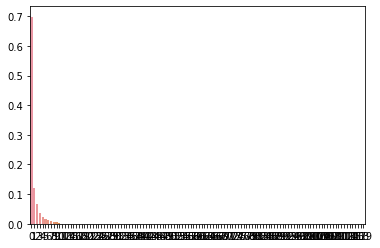

In [ ]:
%matplotlib inline
import seaborn as sns
ax = sns.barplot( data=explained_var)

#Save data

In [ ]:
import h5py 
hf = h5py.File('/content/drive/MyDrive/workshop_neuro/dataset/A/train_A_PCA_120.h5', 'w')
hf.create_dataset('dataset_epoch_train', data=epoch_fin_train) 
hf.create_dataset('dataset_epoch_labels_train', data=epoch_labels_binary_train)
hf.close()
hf1 = h5py.File('/content/drive/MyDrive/workshop_neuro/dataset/A/stimulus_code_train.h5', 'w')
hf1.create_dataset('StimulusCode',data=stimulus_code_train)
hf1.close()
hf2 = h5py.File('/content/drive/MyDrive/workshop_neuro/dataset/A/test_A_PCA_120.h5', 'w')
hf2.create_dataset('dataset_epoch_test', data=epoch_fin_test) 
hf2.create_dataset('dataset_epoch_labels_test', data=epoch_labels_binary_test)
hf2.close()
hf3 = h5py.File('/content/drive/MyDrive/workshop_neuro/dataset/A/stimulus_code_test.h5', 'w')
hf3.create_dataset('StimulusCode',data=stimulus_code_test)
hf3.close()
chars_train.tofile('/content/drive/MyDrive/workshop_neuro/dataset/A/target_chars_train.csv',sep=',')
chars_test.tofile('/content/drive/MyDrive/workshop_neuro/dataset/A/target_chars_test.csv',sep=',')

#**RESTART THE RUN TIME**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt   # Required to plot data
import numpy as np                # Management of arrays
import os                         # System utils
import pandas as pd
from pathlib import Path          # path and file utils
from scipy.io import loadmat      # Required to load .mat files
from scipy import signal          # Required for signal processing
from tqdm.auto import tqdm  
import h5py
import keras
from collections import Counter
import csv

In [ ]:
#TUTTI tranne Ines
hf = h5py.File('/content/drive/MyDrive/workshop_neuro/dataset/A/train_A_PCA_120.h5', 'r')
hf1 = h5py.File('/content/drive/MyDrive/workshop_neuro/dataset/A/stimulus_code_train.h5', 'r')
hf2 = h5py.File('/content/drive/MyDrive/workshop_neuro/dataset/A/test_A_PCA_120.h5', 'r')
hf3 = h5py.File('/content/drive/MyDrive/workshop_neuro/dataset/A/stimulus_code_test.h5', 'r')

epoch_fin_train = hf.get('dataset_epoch_train')
epoch_labels_binary_train = hf.get('dataset_epoch_labels_train')
stimulus_code_train= hf1.get('StimulusCode')
epoch_fin_test = hf2.get('dataset_epoch_test')
epoch_labels_binary_test = hf2.get('dataset_epoch_labels_test')
stimulus_code_test= hf3.get('StimulusCode')
chars_train = []
chars_test = []
  # Read file content
with open('/content/drive/MyDrive/workshop_neuro/dataset/A/target_chars_train.csv', "r") as f:
  file_content = f.read()
  # Loop over all rows (except first one)
  for row in file_content.split("','"):
    chars_train.append(row)
with open('/content/drive/MyDrive/workshop_neuro/dataset/A/target_chars_test.csv', "r") as f:
  file_content = f.read()
  # Loop over all rows (except first one)
  for row in file_content.split("','"): 
    chars_test.append(row)
epoch_fin_train = np.array(epoch_fin_train)
epoch_labels_binary_train =np.array(epoch_labels_binary_train)
stimulus_code_train=np.array(stimulus_code_train)
epoch_fin_test = np.array(epoch_fin_test)
epoch_labels_binary_test =np.array(epoch_labels_binary_test)
stimulus_code_test=np.array(stimulus_code_test)
chars_train = np.array(chars_train)
chars_test = np.array(chars_test)


# NORMALIZATION FOR DOWNSAMPLING


In [ ]:
#Standardization for each epoch on channels and PCA on time
'''from sklearn.preprocessing import MinMaxScaler   # use the min max scaler between [-1,1] for PCA
#dataset = []
epoch_pca_train = []
epoch_pca_test = []
for i in range(64) :
  dataset = epoch_fin_train[:,:,i] 
  dataset_test = epoch_fin_test[:,:,i]  
  # Apply min max scaler
  mm_scaler =  MinMaxScaler(copy=False,feature_range=(-1, 1))   
  epoch_pca_train.append(mm_scaler.fit_transform(dataset))
  epoch_pca_test.append(mm_scaler.transform(dataset_test))
epoch_pca_train = np.array(epoch_pca_train)
epoch_pca_train.shape 
epoch_pca_test = np.array(epoch_pca_test)
epoch_pca_test.shape 
 
#Dataset after standardisation and PCA
epoch_fin_train = []
for i in range(64):
  a = epoch_pca_train[i].transpose()
  epoch_fin_train.append(a)

epoch_fin_train = np.array(epoch_fin_train)
epoch_fin_train = epoch_fin_train.transpose()
epoch_fin_train.shape #non dovrebbe essere (1500,64,120)? 
epoch_fin_test = []
for i in range(64):
  a = epoch_pca_test[i].transpose()
  epoch_fin_test.append(a)
epoch_fin_test = np.array(epoch_fin_test)
epoch_fin_test = epoch_fin_test.transpose()
epoch_fin_test.shape

SyntaxError: ignored

#Split train validation


In [ ]:
#split train validation set: the observation dimension (the 1500) needs to be in the x axis in order for this to work
from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND VALIDATION SET
X_train, X_val, y_train, y_val = train_test_split(epoch_fin_train, epoch_labels_binary_train, test_size=0.3, stratify=epoch_labels_binary_train, random_state=123) #fix random seed for X_train.shape 

In [ ]:
!pip install keras-balanced-batch-generator
from keras_balanced_batch_generator import make_generator

batch_size = 264

X_train = X_train.reshape(len(X_train),X_train.shape[1],64,1)
X_val = X_val.reshape(len(X_val),X_val.shape[1],64,1)
y_train=keras.utils.to_categorical(y_train)
y_val=keras.utils.to_categorical(y_val)
epoch_fin_test = epoch_fin_test.reshape(len(epoch_fin_test),epoch_fin_test.shape[1],64,1)

generator = make_generator(X_train, y_train,batch_size=batch_size,seed=123)


In [ ]:
'''#Oversample Training set
!pip install imblearn
from collections import Counter
from imblearn.over_sampling import RandomOverSampler, SMOTE,ADASYN
epoch_resample = []
print('Original dataset shape %s' % Counter(y_train))
X_train = X_train.reshape(len(X_train),64*120)
ros = RandomOverSampler(random_state=123)
X_res, epoch_labels_resample = ros.fit_resample(X_train, y_train)
X_train = X_res.reshape(X_res.shape[0],120,64,1)
X_val = X_val.reshape(len(X_val),X_train.shape[1],64,1)
epoch_fin_test = epoch_fin_test.reshape(len(epoch_fin_test),epoch_fin_test.shape[1],64,1)
y_train = epoch_labels_resample
#for i in range (64):
 # ros = SMOTE(random_state=123)
  #X_res, epoch_labels_resample = ros.fit_resample(X_train[:,:,i], y_train)
  #epoch_resample.append(X_res)
#epoch_resample = np.array(epoch_resample)
print('Resample dataset shape %s' % Counter(epoch_labels_resample))


SyntaxError: ignored

In [ ]:
X_train.shape

(10710, 120, 64, 1)

#Model CNN

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import initializers
from keras import regularizers
def build_model2d(image_heigth=X_train.shape[1],image_weigth=64, image_depth=1, learn_rate=0.001, dropout_rate=0.5):

  input_layer = keras.layers.Input(shape=[image_heigth,image_weigth, image_depth])
  
  layers2 = keras.layers.Conv2D(filters=20, kernel_size=(1,64), strides = (1,64),padding="same", activation=tf.keras.layers.LeakyReLU(alpha=0.2),kernel_regularizer= regularizers.l1(0.0005),bias_regularizer = regularizers.l1(0.0005)) (input_layer)


  layers3_1 = keras.layers.Conv2D(strides=(5,1),filters=16,kernel_size=(5,1),padding="same", activation=tf.keras.layers.LeakyReLU(alpha=0.2))(layers2)      

  
  layers3_2 = keras.layers.Conv2D(strides=(10,1),filters=16, kernel_size=(10,1), padding="same",activation=tf.keras.layers.LeakyReLU(alpha=0.2))(layers2)  
  
  layers3_3 = keras.layers.Conv2D(strides=(15,1),filters=16, kernel_size=(15,1), padding="same", activation=tf.keras.layers.LeakyReLU(alpha=0.2))(layers2)                                                                                    
  
  layers4 = keras.layers.concatenate([layers3_1,layers3_2,layers3_3],axis=1)

  layers4 = keras.layers.Dropout(rate=dropout_rate)(layers4)
  #layers4 = keras.layers.BatchNormalization()(layers4)
  layers5_1 = keras.layers.Conv2D(strides=(2,1),filters=16,kernel_size=(2,1),padding="same", activation=tf.keras.layers.LeakyReLU(alpha=0.2))(layers4)      
  
  layers5_2 = keras.layers.Conv2D(strides=(4,1),filters=16, kernel_size=(4,1), padding="same",activation=tf.keras.layers.LeakyReLU(alpha=0.2))(layers4)  
  
  layers5_3 = keras.layers.Conv2D(strides=(11,1),filters=16, kernel_size=(11,1), padding="same", activation=tf.keras.layers.LeakyReLU(alpha=0.2))(layers4) 
  
  layers6 = keras.layers.concatenate([layers5_1,layers5_2,layers5_3],axis=1)
  
  layers6 = keras.layers.Dropout(rate=dropout_rate)(layers6)
  #layers6 = keras.layers.BatchNormalization()(layers6)
  layers7 = keras.layers.MaxPool2D(pool_size=(2,1))(layers6)

  layers8 = keras.layers.Flatten()(layers7)

  layers8 = keras.layers.Dense(100, activation=tf.keras.layers.LeakyReLU(alpha=0.2))(layers8)
  
  layers9 = keras.layers.Dense(2, activation=tf.nn.softmax)(layers8)

  #layers9= keras.layers.Dense(2, activation="sigmoid")(layers8)
    
  model = keras.Model(inputs=input_layer,
                        outputs= layers9,
                        name="p300_model"
                        )
  	# Compile model
  optimizer = keras.optimizers.Adam(learning_rate=learn_rate)
  model.compile(
      
      optimizer = optimizer,
      loss = 'sparse_categorical_crossentropy',
      metrics = ['accuracy'])
    
  return model 
model = build_model2d(image_heigth = X_train.shape[1],image_weigth= 64,image_depth = 1)    
model.summary()

Model: "p300_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 120, 64, 1)] 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 120, 1, 20)   1300        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 24, 1, 16)    1616        conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 12, 1, 16)    3216        conv2d[0][0]                     
_________________________________________________________________________________________

In [ ]:
'''#MODELO INÊS 
import tensorflow as tf
from tensorflow import keras
from keras import regularizers
#from numpy.random import seed
#seed(1)
#tf.random.set_seed(1)

def build_model2d(image_heigth=120,image_weigth=64, image_depth=1, learn_rate=0.001, dropout_rate=0.5,l1=regularizers.l1(0.0001)):

  input_layer = keras.layers.Input(shape=[image_heigth,image_weigth, image_depth])
  
  layers2 = keras.layers.Conv2D(filters=20, kernel_size=(1,64), strides = (1,64),padding="same", activation="relu",kernel_regularizer=l1)(input_layer)

  layers3_1 = keras.layers.Conv2D(strides=(5,1),filters=16,kernel_size=(5,1),padding="same", activation="relu",kernel_regularizer=l1)(layers2)      

  layers3_2 = keras.layers.Conv2D(strides=(10,1),filters=16, kernel_size=(10,1), padding="same",activation="relu",kernel_regularizer=l1)(layers2)  

  layers3_3 = keras.layers.Conv2D(strides=(15,1),filters=16, kernel_size=(15,1), padding="same", activation="relu",kernel_regularizer=l1)(layers2)                                                                                    

  layers4 = keras.layers.concatenate([layers3_1,layers3_2,layers3_3],axis=1)

  layers4 = keras.layers.Dropout(rate=dropout_rate)(layers4)

  layers5_1 = keras.layers.Conv2D(strides=(2,1),filters=16,kernel_size=(2,1),padding="same", activation="relu",kernel_regularizer=l1)(layers4)      

  layers5_2 = keras.layers.Conv2D(strides=(4,1),filters=16, kernel_size=(4,1), padding="same",activation="relu",kernel_regularizer=l1)(layers4)  

  layers5_3 = keras.layers.Conv2D(strides=(11,1),filters=16, kernel_size=(11,1), padding="same", activation="relu",kernel_regularizer=l1)(layers4) 

  layers6 = keras.layers.concatenate([layers5_1,layers5_2,layers5_3],axis=1)

  layers6 = keras.layers.Dropout(rate=dropout_rate)(layers6)

  layers7 = keras.layers.MaxPool2D(pool_size=(2,1))(layers6)

  layers8 = keras.layers.Flatten()(layers7)

  layers8 = keras.layers.Dense(100, activation="relu",kernel_regularizer=l1)(layers8) #, kernel_initializer = 'he_normal', kernel_regularizer=l1

  layers9 = keras.layers.Dense(2, activation=tf.nn.softmax,kernel_regularizer=l1)(layers8) #, kernel_initializer = 'he_normal', kernel_regularizer=l1

  #layers9= keras.layers.Dense(2, activation="sigmoid")(layers8)
    
  model = keras.Model(inputs=input_layer,
                        outputs= layers9,
                        name="p300_model"
                        )
  	# Compile model
  optimizer = keras.optimizers.Adam(learning_rate=learn_rate)
  model.compile(
      optimizer = optimizer,
      loss = 'sparse_categorical_crossentropy',
      metrics = ['accuracy'])
    
  return model 
model = build_model2d(120,64,1,0.001,0.5)    
model.summary()'''

'#MODELO INÊS \nimport tensorflow as tf\nfrom tensorflow import keras\nfrom keras import regularizers\n#from numpy.random import seed\n#seed(1)\n#tf.random.set_seed(1)\n\ndef build_model2d(image_heigth=120,image_weigth=64, image_depth=1, learn_rate=0.001, dropout_rate=0.5,l1=regularizers.l1(0.0001)):\n\n  input_layer = keras.layers.Input(shape=[image_heigth,image_weigth, image_depth])\n  \n  layers2 = keras.layers.Conv2D(filters=20, kernel_size=(1,64), strides = (1,64),padding="same", activation="relu",kernel_regularizer=l1)(input_layer)\n\n  layers3_1 = keras.layers.Conv2D(strides=(5,1),filters=16,kernel_size=(5,1),padding="same", activation="relu",kernel_regularizer=l1)(layers2)      \n\n  layers3_2 = keras.layers.Conv2D(strides=(10,1),filters=16, kernel_size=(10,1), padding="same",activation="relu",kernel_regularizer=l1)(layers2)  \n\n  layers3_3 = keras.layers.Conv2D(strides=(15,1),filters=16, kernel_size=(15,1), padding="same", activation="relu",kernel_regularizer=l1)(layers2)    

## Training

In [ ]:
model.compile(
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])
#class_weighs = {0:1.0,1:5.0}
history = model.fit(generator, steps_per_epoch=X_train.shape[0]/batch_size,epochs=20,validation_data=(X_val,y_val))

Epoch 1/20
41/40 [==============================] - 3s 75ms/step - loss: 0.7100 - accuracy: 0.5304 - val_loss: 0.7004 - val_accuracy: 0.5771
Epoch 2/20
41/40 [==============================] - 3s 69ms/step - loss: 0.6934 - accuracy: 0.5850 - val_loss: 0.7115 - val_accuracy: 0.5468
Epoch 3/20
41/40 [==============================] - 3s 69ms/step - loss: 0.6736 - accuracy: 0.6171 - val_loss: 0.6607 - val_accuracy: 0.6294
Epoch 4/20
41/40 [==============================] - 3s 70ms/step - loss: 0.6442 - accuracy: 0.6503 - val_loss: 0.6285 - val_accuracy: 0.6610
Epoch 5/20
41/40 [==============================] - 3s 70ms/step - loss: 0.6270 - accuracy: 0.6671 - val_loss: 0.6525 - val_accuracy: 0.6312
Epoch 6/20
41/40 [==============================] - 3s 70ms/step - loss: 0.6112 - accuracy: 0.6881 - val_loss: 0.6038 - val_accuracy: 0.6800
Epoch 7/20
41/40 [==============================] - 3s 69ms/step - loss: 0.5945 - accuracy: 0.7048 - val_loss: 0.5644 - val_accuracy: 0.7176
Epoch 8/20
41

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
axes = plt.gca()
axes.set_xlim([0,20])
axes.set_ylim([0,1])
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
ax = plt.axes()        
ax.yaxis.grid()
axes.set_yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
axes.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
axes1 = plt.gca()
axes1.set_ylim([0,1])
ax1 = plt.axes()        
ax1.yaxis.grid()
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
axes1.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
axes1.set_yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.legend()
plt.show()

NameError: ignored

In [ ]:
from keras.callbacks import EarlyStopping, History
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau

model.fit(X_train,y_train, batch_size =264, epochs =20,callbacks=[
                              EarlyStopping(monitor='val_accuracy', patience=7,restore_best_weights=True), 
                              History(),
                              #ModelCheckpoint(filepath = 'model_zero7.{epoch:02d}-{val_loss:.6f}.hdf5',verbose=1, save_best_only=True, save_weights_only = True),
                              ReduceLROnPlateau(monitor='val_loss', factor=0.1,patience=2, min_lr=0.000001, verbose=1)] , 
                              validation_data=(X_val,y_val)) 

Epoch 1/20
68/68 [==============================] - 5s 70ms/step - loss: 0.7078 - accuracy: 0.5201 - val_loss: 0.7125 - val_accuracy: 0.4137
Epoch 2/20
68/68 [==============================] - 4s 64ms/step - loss: 0.6859 - accuracy: 0.5831 - val_loss: 0.6804 - val_accuracy: 0.6120
Epoch 3/20
68/68 [==============================] - 4s 63ms/step - loss: 0.6412 - accuracy: 0.6527 - val_loss: 0.6272 - val_accuracy: 0.6767
Epoch 4/20
68/68 [==============================] - 4s 63ms/step - loss: 0.6060 - accuracy: 0.6930 - val_loss: 0.6476 - val_accuracy: 0.6399
Epoch 5/20
68/68 [==============================] - 4s 63ms/step - loss: 0.5764 - accuracy: 0.7178 - val_loss: 0.5611 - val_accuracy: 0.7296
Epoch 6/20
68/68 [==============================] - 4s 63ms/step - loss: 0.5640 - accuracy: 0.7322 - val_loss: 0.5667 - val_accuracy: 0.7183
Epoch 7/20
68/68 [==============================] - 4s 63ms/step - loss: 0.5439 - accuracy: 0.7459 - val_loss: 0.5419 - val_accuracy: 0.7351
Epoch 8/20
68

## Prediction on test set

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
#usare qua loaded_model invece di model quando se fa load model
y_pred = model.predict(epoch_fin_test)
y_final = []

for i in range(len(y_pred)):
  if y_pred[i,1]>0.5:
    y_final.append(1)
  else:
    y_final.append(0)

y_final = np.array(y_final)

#Prediction load model

In [ ]:
import matplotlib.pyplot as plt   # Required to plot data
import numpy as np                # Management of arrays
import os                         # System utils
import pandas as pd
from pathlib import Path          # path and file utils
from scipy.io import loadmat      # Required to load .mat files
from scipy import signal          # Required for signal processing
from tqdm.auto import tqdm  
import h5py
import keras
from collections import Counter
import csv
import tensorflow as tf

hf2 = h5py.File('/content/drive/MyDrive/workshop_neuro/dataset/A/test_A_PCA_120.h5', 'r')
hf3 = h5py.File('/content/drive/MyDrive/workshop_neuro/dataset/A/stimulus_code_test.h5', 'r')

epoch_fin_test = hf2.get('dataset_epoch_test')
epoch_labels_binary_test = hf2.get('dataset_epoch_labels_test')
stimulus_code_test= hf3.get('StimulusCode')

chars_test = []
  # Read file content
with open('/content/drive/MyDrive/workshop_neuro/dataset/A/target_chars_test.csv', "r") as f:
  file_content = f.read()
  # Loop over all rows (except first one)
  for row in file_content.split("','"): 
    chars_test.append(row)

epoch_fin_test = np.array(epoch_fin_test)
epoch_labels_binary_test =np.array(epoch_labels_binary_test)
stimulus_code_test=np.array(stimulus_code_test)

chars_test = np.array(chars_test)

#Load model
filepath = Path('drive') / 'MyDrive'/'workshop_neuro' / 'modelli_salvati'/'A' /'pca120_fin'
loaded_model = tf.keras.models.load_model(filepath)
#np.testing.assert_allclose(model.predict(epoch_fin_test), loaded_model.predict(epoch_fin_test))

In [ ]:
filepath

PosixPath('drive/MyDrive/workshop_neuro/modelli_salvati/A/pca120_fin')

In [ ]:
y_pred = loaded_model.predict(epoch_fin_test)
y_final = []
for i in range(len(y_pred)):
  if y_pred[i,1]>0.5:
    y_final.append(1)
  else:
    y_final.append(0)

y_final = np.array(y_final)

## Gridsearch

In [ ]:
'''import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD
from keras.layers import Dropout
from keras.constraints import maxnorm
from keras.callbacks import EarlyStopping, History
from numpy.random import seed
from sklearn.metrics import f1_score

# create model : need to choose parameters
model_2 = KerasClassifier(build_fn=build_model2d, verbose=0)
# define the grid search parameters
#l1 = [regularizers.l1(0.001), regularizers.l1(0.0001), regularizers.l1(0.01)]
dropout_rate = [0.1, 0.3, 0.5]
learn_rate = [0.0001, 0.001, 0.01]
epochs= [30 ,40 ,50, 80 ,100, 400]
batch_size= [1, 50, 100, 128, 150, 200, 300, 400, 500, 600]#,100]
param_grid = dict(learn_rate=learn_rate,dropout_rate=dropout_rate, epochs=epochs, batch_size=batch_size)#kernel_regularizer=l1
#In grid search set parameters like cross-validation 3-fold or 5-fold
grid = GridSearchCV(estimator=model_2, param_grid=param_grid, n_jobs=-1, cv=3)#, scoring='accuracy'
#fit our model with the grid search 
grid_result = grid.fit(X_train,y_train,  validation_data=(X_val,y_val))
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))'''

'import tensorflow as tf\nfrom tensorflow import keras\nfrom sklearn.model_selection import GridSearchCV\nfrom keras.models import Sequential\nfrom keras.layers import Dense\nfrom keras.layers import Flatten\nfrom keras.wrappers.scikit_learn import KerasClassifier\nfrom keras.optimizers import SGD\nfrom keras.layers import Dropout\nfrom keras.constraints import maxnorm\nfrom keras.callbacks import EarlyStopping, History\nfrom numpy.random import seed\nfrom sklearn.metrics import f1_score\n\n# create model : need to choose parameters\nmodel_2 = KerasClassifier(build_fn=build_model2d, verbose=0)\n# define the grid search parameters\n#l1 = [regularizers.l1(0.001), regularizers.l1(0.0001), regularizers.l1(0.01)]\ndropout_rate = [0.1, 0.3, 0.5]\nlearn_rate = [0.0001, 0.001, 0.01]\nepochs= [30 ,40 ,50, 80 ,100, 400]\nbatch_size= [1, 50, 100, 128, 150, 200, 300, 400, 500, 600]#,100]\nparam_grid = dict(learn_rate=learn_rate,dropout_rate=dropout_rate, epochs=epochs, batch_size=batch_size)#kerne

# Metrics

In [ ]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score

cm=confusion_matrix(y_pred=y_final,y_true=epoch_labels_binary_test) 
TN=cm[0,0] 
FP=cm[0,1] 
FN=cm[1,0] 
TP=cm[1,1]
#Sensitivity:

Se=TP/(TP+FN)
#Specificity

Sp=TN/(TN+FP)
#Accuracy

Acc=accuracy_score(y_pred=y_final,y_true=epoch_labels_binary_test)
#Positive predicted value

PPV=TP/(TP+FP)
#Negative predictive value

NPV=TN/(TN+FN)

print("**********") 
print("  Metrics  ") 
print("**********") 
print("Accuracy = %.4f" % Acc) 
print("True positive = %d" % TP) 
print("True negative = %d" % TN) 
print("False positive = %d" % FP) 
print("False negative = %d" % FN) 
print("Sensitivity = %.4f" % Se) 
print("Specificity = %.4f" % Sp) 
print("Positive predicted value = %.4f" % PPV)
print("Negative predictive value = %.4f" % NPV)

**********
  Metrics  
**********
Accuracy = 0.6931
True positive = 2006
True negative = 10469
False positive = 4531
False negative = 994
Sensitivity = 0.6687
Specificity = 0.6979
Positive predicted value = 0.3069
Negative predictive value = 0.9133


# Lecter prediction

In [ ]:
MATRICE = [['A','B','C','D','E','F'], 
          ['G','H','I','J','K','L'],
          ['M','N','O','P','Q','R'],
          ['S','T','U','V','W','X'],
          ['Y','Z','1','2','3','4'],
          ['5','6','7','8','9','_']]

MATRICE = np.array(MATRICE)
chars_test[0]='W'
chars_test[-1]='U'

## Most common

In [ ]:
#Try to confirm algorithm with true labels of P300 and character target
import collections 
save_column= []
save_row= []
pred_char= [] #our prediction character will be a vector of size= n_char
n_trials=15
n_epochs=180
n_char=100
n_total=n_epochs*n_char

#Predict character 
for i in range(0, n_total, n_epochs): #iterate in y_final vector in intervals of 180. eg: start from 0 to 180, then 180 to 360
  for j in range(i, i+n_epochs-1):    #from 0 untill 0+179 -> first 180 group; 2nd iteration: from 180 untill 180+179...
    if y_final[j]==1 :
      if stimulus_code_test[j]<7 :
        save_column.append(stimulus_code_test[j])
      else :
        save_row.append(stimulus_code_test[j])

  row = collections.Counter(save_row).most_common(1)[0][0] 
  print('row  %s' % collections.Counter(save_row))
  row = int(row)
   
  
  column= collections.Counter(save_column).most_common(1)[0][0]
  print('column  %s' % collections.Counter(save_column))
  column= int(column) 
  

  pred_char.append(MATRICE[row-7, column-1]) #if row is 7 we want to give index = 0, if column=1 we want column=0.
  save_column= []
  save_row= []

row  Counter({10.0: 10, 7.0: 6, 11.0: 6, 12.0: 5, 8.0: 4, 9.0: 3})
column  Counter({5.0: 12, 4.0: 7, 2.0: 4, 1.0: 4, 3.0: 4, 6.0: 2})
row  Counter({9.0: 10, 10.0: 7, 7.0: 6, 8.0: 5, 11.0: 3, 12.0: 3})
column  Counter({5.0: 9, 4.0: 6, 2.0: 3, 3.0: 3, 1.0: 3, 6.0: 2})
row  Counter({10.0: 8, 11.0: 8, 7.0: 7, 12.0: 6, 9.0: 5, 8.0: 3})
column  Counter({6.0: 6, 5.0: 6, 4.0: 6, 1.0: 5, 3.0: 4, 2.0: 2})
row  Counter({11.0: 7, 9.0: 7, 10.0: 5, 8.0: 5, 12.0: 4, 7.0: 4})
column  Counter({4.0: 12, 3.0: 7, 5.0: 5, 1.0: 3, 2.0: 2, 6.0: 2})
row  Counter({8.0: 11, 9.0: 6, 7.0: 6, 11.0: 5, 12.0: 3, 10.0: 3})
column  Counter({6.0: 10, 5.0: 8, 3.0: 7, 2.0: 4, 4.0: 3, 1.0: 1})
row  Counter({11.0: 8, 12.0: 6, 8.0: 6, 7.0: 5, 9.0: 5, 10.0: 1})
column  Counter({2.0: 11, 6.0: 7, 5.0: 6, 1.0: 6, 4.0: 4, 3.0: 2})
row  Counter({7.0: 10, 8.0: 7, 9.0: 5, 10.0: 4, 11.0: 4, 12.0: 4})
column  Counter({3.0: 12, 5.0: 7, 6.0: 6, 2.0: 5, 4.0: 4, 1.0: 4})
row  Counter({8.0: 8, 9.0: 8, 7.0: 6, 11.0: 5, 10.0: 4, 12.0: 4})
c

In [ ]:
count=0
save_ind= []
for i in range(len(pred_char)):
  if pred_char[i]!=chars_test[i]:
    save_ind.append(i)
    count=count+1
print('number of error letter predicted %i' % count)

number of error letter predicted 17


In [ ]:
pred_char = np.array(pred_char)
pred_char

array(['W', 'Q', 'X', '2', 'L', 'Z', 'C', 'I', 'M', 'R', 'K', 'O', 'K',
       '7', 'Y', 'F', '2', 'D', 'D', 'Z', '1', 'D', 'P', 'L', '9', 'N',
       'N', 'V', 'G', 'R', 'Q', 'D', 'J', 'C', 'U', 'J', 'R', 'M', 'E',
       'U', 'O', 'O', 'O', 'J', 'D', '2', 'U', 'F', 'Y', 'P', 'O', 'O',
       '8', '9', '7', 'L', 'D', 'A', 'Y', 'E', 'G', 'O', 'A', '5', 'V',
       'H', 'N', 'E', 'K', 'B', 'T', 'X', 'O', 'O', '1', 'T', 'D', 'O',
       'I', 'L', 'U', 'D', 'D', '5', 'H', 'F', 'A', 'E', 'A', 'X', 'A',
       '3', '_', 'K', '4', 'R', '3', 'M', 'P', 'U'], dtype='<U1')

## Mean

In [ ]:
#Media
n_char=100
sum_matrix=np.zeros((12,n_char))
mean_matrix=np.zeros((12,n_char)) #for line =0 this is stimulus code=1, line=1 stimulus_code=2 etc  
mean_rep = []
n_epochs=180
stim_code=0
count_matrix= np.zeros((12))
for k in range(15):#0,1,2...14
  for char in range(n_char): #0, 1,2,...99
  
    for m in range(k+1):      #0,1, 2 ....14
      for j in range(n_epochs*char +12*m, (n_epochs*char+12 +12*m)): # (0,12 ; 12, 12+12...), (180, 180+12;)
      
        stim_code=stimulus_code_test[j]
        stim_code=int(stim_code)

        count_matrix[stim_code-1]=count_matrix[stim_code-1] +1
        sum_matrix[stim_code-1,char]= sum_matrix[stim_code-1,char] + y_pred[j,1]
      mean_matrix[:,char]= sum_matrix[:,char]/count_matrix[:]
  mean_rep.append(mean_matrix)
  count_matrix = np.zeros((12))
  sum_matrix=np.zeros((12,n_char))
  mean_matrix=np.zeros((12,n_char))
mean_rep = np.array(mean_rep)
mean_rep.shape

(15, 12, 100)

In [ ]:
#pred_char_media= []
letter_matrix = []
row=0
column=0
max_column=0
max_row=0
pred_char_media=[]
for k in range (15):
  for char in range(n_char):
    for i in range(12):
      if i<6:
        if max_column<mean_rep[k,i,char]:
          max_column=mean_rep[k,i,char]
          column=int(i)
        #print(column)
      else:
        if max_row<mean_rep[k,i,char]:
          max_row=mean_rep[k,i,char]
          row=int(i)
  #if char==1:
    #print(row)
    #print(column)
    pred_char_media.append(MATRICE[row-6, column]) #if row is 7 we want to give index = 0, if column=1 we want column=0.
    max_column=0
    max_row=0
  letter_matrix.append(pred_char_media)
  pred_char_media=[]
letter_matrix= np.array(letter_matrix)

In [ ]:
count=np.zeros((15))
accuracy = np.zeros((15))
save_ind= []
for k in range(15):

  for i in range(100):
    if letter_matrix[k,i]!=chars_test[i]:
      
      count[k]=count[k]+1
      accuracy[k] = (1 - count[k]/len(chars_test))*100
  
  print('number of error letter predicted  %i' % count[k])
  print('accuracy  %i' % accuracy[k])

  count=np.zeros((15))

number of error letter predicted  86
accuracy  14
number of error letter predicted  70
accuracy  30
number of error letter predicted  58
accuracy  42
number of error letter predicted  54
accuracy  46
number of error letter predicted  47
accuracy  53
number of error letter predicted  43
accuracy  57
number of error letter predicted  38
accuracy  62
number of error letter predicted  33
accuracy  67
number of error letter predicted  31
accuracy  69
number of error letter predicted  22
accuracy  78
number of error letter predicted  20
accuracy  80
number of error letter predicted  17
accuracy  83
number of error letter predicted  12
accuracy  88
number of error letter predicted  11
accuracy  89
number of error letter predicted  8
accuracy  92


In [ ]:
letter_matrix[14]

array(['W', 'Q', 'X', 'P', 'L', 'Z', 'C', 'I', 'M', 'R', 'K', 'O', 'K',
       '7', 'Y', 'F', 'Z', 'D', 'E', 'Z', '1', 'D', 'Q', 'L', '9', 'N',
       'N', 'V', 'G', 'R', 'Q', 'D', 'J', 'C', 'U', 'J', 'R', 'M', 'E',
       'U', 'C', 'O', 'O', 'J', 'D', '2', 'U', 'F', 'Y', 'P', 'O', 'O',
       '8', 'J', '7', 'L', 'D', 'A', 'Y', 'E', 'G', 'O', 'A', '5', 'V',
       'Z', 'N', 'E', 'H', 'B', 'W', 'X', 'O', 'O', '3', 'T', 'D', 'O',
       'I', 'L', 'U', 'E', 'E', '5', 'H', 'F', 'A', 'E', 'E', 'X', 'A',
       'W', '_', 'K', '4', 'R', '3', 'M', 'R', 'U'], dtype='<U1')

In [ ]:
import scipy.io as sio
# Create a dictionary
adict = {}
adict['pkt_np_array'] = accuracy
sio.savemat('/content/drive/MyDrive/workshop_neuro/testmat.mat', adict)

In [ ]:
import h5py 
hf = h5py.File('/content/drive/MyDrive/workshop_neuro/dataset/accuracy_A', 'w')
hf.create_dataset('accuracy_A', data=accuracy) 
hf.close()

In [ ]:
chars_test

array(['W', 'Q', 'X', 'P', 'L', 'Z', 'C', 'O', 'M', 'R', 'K', 'O', '9',
       '7', 'Y', 'F', 'Z', 'D', 'E', 'Z', '1', 'D', 'P', 'I', '9', 'N',
       'N', 'V', 'G', 'R', 'Q', 'D', 'J', 'C', 'U', 'V', 'R', 'M', 'E',
       'U', 'O', 'O', 'O', 'J', 'D', '2', 'U', 'F', 'Y', 'P', 'O', 'O',
       '6', 'J', '7', 'L', 'D', 'G', 'Y', 'E', 'G', 'O', 'A', '5', 'V',
       'H', 'N', 'E', 'H', 'B', 'T', 'X', 'O', 'O', '1', 'T', 'D', 'O',
       'I', 'L', 'U', 'E', 'E', '5', 'B', 'F', 'A', 'E', 'E', 'X', 'A',
       'W', '_', 'K', '4', 'R', '3', 'M', 'R', 'U'], dtype='<U2')

In [ ]:
#Save model
from tensorflow.keras.models import save_model, load_model
filepath = Path('drive') / 'MyDrive' /'workshop_neuro'/ 'modelli_salvati'/'A' /'pca120_fin'
#filepath = Path('drive') / 'MyDrive' /...
save_model(model, filepath)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: drive/MyDrive/workshop_neuro/modelli_salvati/A/pca120_fin/assets


[]

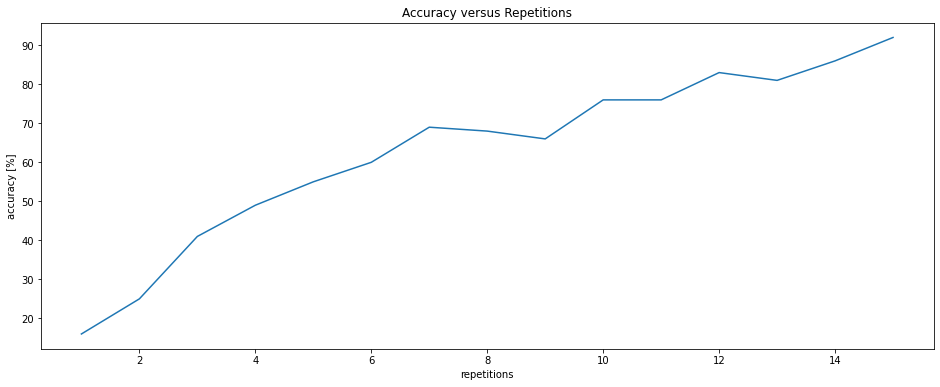

In [ ]:
# Prepare figure
repetitions = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
plt.figure(figsize=(16,6))
plt.plot(repetitions, accuracy)

# Set up labels and titles
plt.title('Accuracy versus Repetitions')
plt.xlabel('repetitions')
plt.ylabel('accuracy [%]')
plt.plot()


Letter prediction accuracy subject A and B as a function of droput rate

In [ ]:
do = np.zeros(10)
Accuracy_lA = np.zeros(10)
do[0] = 0
Accuracy_lA[0] = 86
do[9] = 90
Accuracy_lA[9] = 78
do[8] = 80
Accuracy_lA[8] = 87
do[7] = 70
Accuracy_lA[7] = 89
do[6] = 60
Accuracy_lA[6] = 88
do[5] = 50
Accuracy_lA[5] = 92
do[4] = 40
Accuracy_lA[4] = 89
do[3] = 30
Accuracy_lA[3] = 87
do[2] = 20
Accuracy_lA[2] = 90
do[1] = 10
Accuracy_lA[1] = 84
Accuracy_lB = np.zeros(10)
Accuracy_lB[0] = 90
Accuracy_lB[9] = 94
Accuracy_lB[8] = 97
Accuracy_lB[7] = 95
Accuracy_lB[6] = 96
Accuracy_lB[5] = 98
Accuracy_lB[4] = 96
Accuracy_lB[3] = 97
Accuracy_lB[2] = 95
Accuracy_lB[1] = 91


In [ ]:
import matplotlib.pyplot as plt
plt.bar(do-2, Accuracy_lA, color = 'orange', width =4, label = 'Subject A', edgecolor = 'black')
plt.bar(do+2, Accuracy_lB, color = 'brown', width = 4, label = 'Subject B', edgecolor = 'black')
plt.title('Letter Prediction Accuracy')
plt.xlabel("Dropout rate(%)")
plt.ylabel('Letter accuracy(%)',labelpad=11)
axes = plt.gca()
axes.set_yticks([0,10,20,30,40,50,60,70,80,90,100])
axes.set_xticks([0,10,20,30,40,50,60,70,80,90])
#plt.grid(True)
ax = plt.axes()        
ax.yaxis.grid()
plt.show()

Binary classification acuuracy for subject A and B as a function of dropout rate

In [ ]:
Accuracy_B = np.zeros(10)
Accuracy_B[0] = 79
Accuracy_B[9] = 61
Accuracy_B[8] = 74
Accuracy_B[7] = 75
Accuracy_B[6] = 74
Accuracy_B[5] = 77
Accuracy_B[4] = 76
Accuracy_B[3] = 78
Accuracy_B[2] = 77
Accuracy_B[1] = 75
Accuracy_A = np.zeros(10)
Accuracy_A[0] = 75
Accuracy_A[9] = 49
Accuracy_A[8] = 59
Accuracy_A[7] = 65
Accuracy_A[6] = 67
Accuracy_A[5] = 71
Accuracy_A[4] = 71
Accuracy_A[3] = 71
Accuracy_A[2] = 72
Accuracy_A[1] = 74

In [ ]:
import matplotlib.pyplot as plt
plt.bar(do-2, Accuracy_A, color = 'orange', width =4, label = 'Subject A', edgecolor = 'black')
plt.bar(do+2, Accuracy_B, color = 'brown', width = 4, label = 'Subject B', edgecolor = 'black')
plt.title('Binary Classification Accuracy')
plt.xlabel("Dropout rate(%)")
plt.ylabel('Classification accuracy(%)',labelpad = 11)
plt.ylim(0,100)
axes = plt.gca()
axes.set_yticks([0,10,20,30,40,50,60,70,80,90,100])
axes.set_xticks([0,10,20,30,40,50,60,70,80,90])
#plt.grid(True)
ax = plt.axes()        
ax.yaxis.grid()
plt.legend()
plt.show()
plt.savefig('Binary Classification.png')